# Detecting Languages

## Import And Treat Data

### Import Data

In [ ]:
#!pip install python_speech_features

In [18]:
#import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

In [19]:
'''
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)
'''

'\ndef get_MFCC(audio, sr):\n    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)\n    return np.mean(features, axis=0)\n'

In [20]:
'''
features_list=[]
features=[]
l=[]
count=0
wavfiles=glob.glob("/content/drive/My Drive/Recordings/*")
# loading the data from the drive

for name in wavfiles:
  
  # print(name)
  label=name.split("/")[5].split("-")[0]
  
  # recordingno=name.split("/")[5].split("-")[1]
  # print(recordingno)
  #calling the MFCC function for getting features
  sr, audio = read(name)
  features_list=get_MFCC(audio, sr).tolist()

  #encoding the data with 0,1,2 values as labels 
  if(label=="ur"):
    label=0
  elif(label=="en"):
    label=1
  elif(label=="ue"):
    label=2

  features_list.append(label)
  features.append(features_list)
  count=(count+1)
  print(count)
features

#Creating Dataframe 
df=pd.DataFrame(features, columns = ['feat_0','feat_1','feat_2','feat_3','feat_4','feat_5','feat_6','feat_7','feat_8','feat_9','feat_10','feat_11','feat_12','label'])
'''

'\nfeatures_list=[]\nfeatures=[]\nl=[]\ncount=0\nwavfiles=glob.glob("/content/drive/My Drive/Recordings/*")\n# loading the data from the drive\n\nfor name in wavfiles:\n  \n  # print(name)\n  label=name.split("/")[5].split("-")[0]\n  \n  # recordingno=name.split("/")[5].split("-")[1]\n  # print(recordingno)\n  #calling the MFCC function for getting features\n  sr, audio = read(name)\n  features_list=get_MFCC(audio, sr).tolist()\n\n  #encoding the data with 0,1,2 values as labels \n  if(label=="ur"):\n    label=0\n  elif(label=="en"):\n    label=1\n  elif(label=="ue"):\n    label=2\n\n  features_list.append(label)\n  features.append(features_list)\n  count=(count+1)\n  print(count)\nfeatures\n\n#Creating Dataframe \ndf=pd.DataFrame(features, columns = [\'feat_0\',\'feat_1\',\'feat_2\',\'feat_3\',\'feat_4\',\'feat_5\',\'feat_6\',\'feat_7\',\'feat_8\',\'feat_9\',\'feat_10\',\'feat_11\',\'feat_12\',\'label\'])\n'

### Save Data to CSV

In [21]:
'''
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"
f = open('/content/drive/csv_file', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerow(row)

# close the file
f.close()
'''

'\ndf.to_csv(\'data.csv\')\n!cp data.csv "drive/My Drive/"\nf = open(\'/content/drive/csv_file\', \'w\')\n\n# create the csv writer\nwriter = csv.writer(f)\n\n# write a row to the csv file\nwriter.writerow(row)\n\n# close the file\nf.close()\n'

In [22]:
'''
labelmod=[]
for label in d:
  if not type(label)==int:
      l=label.split("_")[0]
      if(l=="ur"):
        labelmod.append(0)
      elif(l=="en"):
        labelmod.append(1)
      elif(l=="ue"):
        labelmod.append(2)
  else:
    labelmod.append(label)

labelmod
df['label'] = labelmod
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"
'''

'\nlabelmod=[]\nfor label in d:\n  if not type(label)==int:\n      l=label.split("_")[0]\n      if(l=="ur"):\n        labelmod.append(0)\n      elif(l=="en"):\n        labelmod.append(1)\n      elif(l=="ue"):\n        labelmod.append(2)\n  else:\n    labelmod.append(label)\n\nlabelmod\ndf[\'label\'] = labelmod\ndf.to_csv(\'data.csv\')\n!cp data.csv "drive/My Drive/"\n'

### Test-Train Split

In [23]:
df = pd.read_csv('MFCCdataframe.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

X= df.iloc[:,:-1]
y= df.iloc[:,-1]

# Train test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3,stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

## KNN

### KNN Cross-Validation

The best number of neighbors is 3


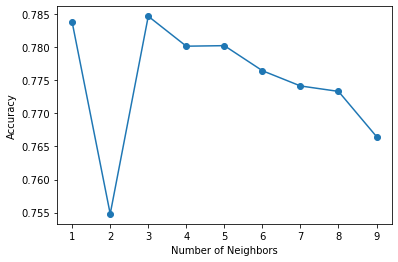

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

knn_accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_validate(knn, train_X, train_Y, cv=5, scoring='accuracy')
    knn_accuracy.append(scores['test_score'].mean())

plt.figure()    
plt.plot(range(1,10), knn_accuracy, '-o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
num_of_neighbors = knn_accuracy.index(max(knn_accuracy)) + 1
print('The best number of neighbors is',num_of_neighbors)

### KNN Testing Data

In [32]:
my_knn = KNeighborsClassifier(n_neighbors=num_of_neighbors)
my_knn.fit(train_X, train_Y)
knn_predictions = my_knn.predict(test_X)

# Accuracy
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(test_Y, knn_predictions)
print('The accuracy of KNN is', knn_accuracy)

# Classification report
from sklearn.metrics import classification_report
knn_classification_report = classification_report(test_Y, knn_predictions,output_dict=True)
knn_precision = knn_classification_report['macro avg']['precision']
print('The precision of KNN is', knn_precision)
knn_recall = knn_classification_report['macro avg']['recall']
print('The recall of KNN is', knn_recall)
knn_f1 = knn_classification_report['macro avg']['f1-score']
print('The f1 score of KNN is', knn_f1)

# Confusion matrix
from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(test_Y, knn_predictions)
knn_confusion_matrix_df = pd.DataFrame(knn_confusion_matrix, index=['Actual Urdu','Actual English', 'Actual Mixed'], columns=['Predicted Urdu', 'Predicted English', 'Predicted Mixed'])
knn_confusion_matrix_df

The accuracy of KNN is 0.8082086689681627
The precision of KNN is 0.8051445074677357
The recall of KNN is 0.8059686335410204
The f1 score of KNN is 0.8052405744939307


,Predicted Urdu,Predicted English,Predicted Mixed
Actual Urdu,1287,159,144
Actual English,212,1233,143
Actual Mixed,186,156,1694


## Random Forrest

### Random Forrest Cross-Validation

The best number of estimators is 54


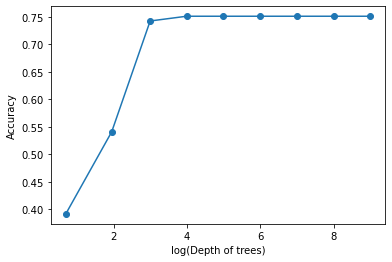

In [24]:
# Random Forrest
from sklearn.ensemble import RandomForestClassifier
# Cross Validation
from sklearn.model_selection import cross_validate
max_depth_range = [ int( np.exp(i)) for i in range(1,10) ] 
random_forrest_accuracy = []
for i in max_depth_range:
    random_forrest = RandomForestClassifier(n_estimators=150, max_depth = i, random_state=0, n_jobs=-1, bootstrap=False)
    scores = cross_validate(random_forrest, train_X, train_Y, cv=5, scoring='accuracy')
    random_forrest_accuracy.append(scores['test_score'].mean())

plt.figure()
plt.plot(np.log(max_depth_range), random_forrest_accuracy, '-o')
plt.xlabel('log(Depth of trees)')
plt.ylabel('Accuracy')
ideal_tree_depth = max_depth_range[ random_forrest_accuracy.index(max(random_forrest_accuracy)) ]
print('The best number of estimators is',ideal_tree_depth)

### Random Forrest Testing Data

In [29]:
my_random_forrest = RandomForestClassifier(n_estimators=1500, max_depth =ideal_tree_depth, random_state=0,n_jobs=-1)
my_random_forrest.fit(train_X, train_Y)
random_forrest_pred = my_random_forrest.predict(test_X)

# Accuracy
random_forrest_accuracy = accuracy_score(test_Y, random_forrest_pred)
print('The accuracy of Random Forrest is', random_forrest_accuracy)

# Classification report
rf_classification_report = classification_report(test_Y, random_forrest_pred,output_dict=True)
rf_precision = rf_classification_report['macro avg']['precision']
print('The precision of Random Forrest is', rf_precision)
rf_recall = rf_classification_report['macro avg']['recall']
print('The recall of Random Forrest is', rf_recall)
rf_f1 = rf_classification_report['macro avg']['f1-score']
print('The f1 score of Random Forrest is', rf_f1)

# Confusion matrix
rf_confusion_matrix = confusion_matrix(test_Y, random_forrest_pred)
rf_confusion_matrix_df = pd.DataFrame(rf_confusion_matrix, index=['Actual Urdu','Actual English', 'Actual Mixed'], columns=['Predicted Urdu', 'Predicted English', 'Predicted Mixed'])
rf_confusion_matrix_df

The accuracy of Random Forrest is 0.7779056386651323
The precision of Random Forrest is 0.781365150024499
The recall of Random Forrest is 0.770298534930726
The f1 score of Random Forrest is 0.7738514811827578


,Predicted Urdu,Predicted English,Predicted Mixed
Actual Urdu,1152,167,271
Actual English,153,1155,280
Actual Mixed,132,155,1749


## Support Vector Machine

### Support Vector Machine Cross-Validation

The best C is 90


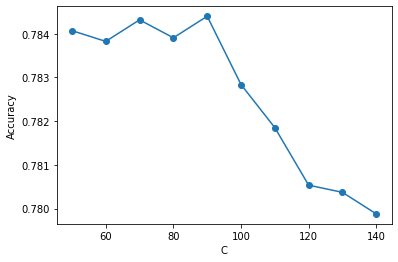

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
# Cross Validation
C_range = [ 10*i for i in range(5,15)]
svc_accuracy = []
for i in C_range:
    svc = SVC(C=i, kernel='rbf', random_state=0)
    scores = cross_validate(svc, train_X, train_Y, cv=5, scoring='accuracy')
    svc_accuracy.append(scores['test_score'].mean())

plt.figure()
plt.plot(C_range, svc_accuracy, '-o')
plt.xlabel('C')
plt.ylabel('Accuracy')
num_of_C = C_range[ svc_accuracy.index(max(svc_accuracy)) ]
print('The best C is',num_of_C)

### Support Vector Machine Testing Data

In [ ]:
my_svc = SVC(C=num_of_C, kernel='rbf', random_state=0)
my_svc.fit(train_X, train_Y)
svc_pred = my_svc.predict(test_X)

# Accuracy
svc_accuracy = accuracy_score(test_Y, svc_pred)
print('The accuracy of SVC is', svc_accuracy)

# Classification report
svc_classification_report = classification_report(test_Y, svc_pred,output_dict=True)
svc_precision = svc_classification_report['macro avg']['precision']
print('The precision of SVC is', svc_precision)
svc_recall = svc_classification_report['macro avg']['recall']
print('The recall of SVC is', svc_recall)
svc_f1 = svc_classification_report['macro avg']['f1-score']
print('The f1 score of SVC is', svc_f1)

# Confusion matrix
svc_confusion_matrix = confusion_matrix(test_Y, svc_pred)
svc_confusion_matrix_df = pd.DataFrame(svc_confusion_matrix, index=['Actual Urdu','Actual English', 'Actual Mixed'], columns=['Predicted Urdu', 'Predicted English', 'Predicted Mixed'])
svc_confusion_matrix_df


The accuracy of SVC is 0.7917146144994246
The precision of SVC is 0.7883619979567126
The recall of SVC is 0.7883898092290184
The f1 score of SVC is 0.7882790465870039


,Predicted Urdu,Predicted English,Predicted Mixed
Actual Urdu,1244,172,174
Actual English,217,1200,171
Actual Mixed,176,176,1684


## Neural Network

### Hidden Layers

In [ ]:
hls = []
hls1 = tuple( int( 1000/(2**i )) for i in range(3) )
hls2 = tuple( int (1000/(2**i) ) for i in range(4) )
hls3 = tuple( int( 1000*(0.8**i) ) for i in range(5) )
hls4 = tuple( int( 1000*(0.7**i) ) for i in range(6) )
hls5 = tuple( int( 1000*(0.6**i) ) for i in range(7) )
hls6 = tuple( int( 500*(0.9**i) ) for i in range(5) )
hls7 = tuple( int( 500*(0.8**i) ) for i in range(6) )
hls8 = tuple( int( 500*(0.7**i) ) for i in range(7) )
hls9 = tuple( int( 500*(0.6**i) ) for i in range(8) )
hls10 = tuple( int( 200*(0.95**i) ) for i in range(10) )
hls_exp = tuple( int( 5000*np.exp(-i-1) ) for i in range(6) )

hls.append(hls1)
#hls.append(hls2)
hls.append(hls3)
hls.append(hls4)
#hls.append(hls5)
hls.append(hls6)
#hls.append(hls7)
#hls.append(hls8)
#hls.append(hls9)
#hls.append(hls10)
#hls.append(hls_exp)

for i in hls:
    print(i)

(1000, 500, 250)
(1000, 800, 640, 512, 409)
(1000, 700, 489, 342, 240, 168)
(500, 450, 405, 364, 328)
(1597, 987, 610, 377, 233, 144, 89, 55, 34, 21)


### Neural Network Testing Data

In [35]:
best_hls = (512,256,128,64)

from sklearn.neural_network import MLPClassifier
my_mlp = MLPClassifier(hidden_layer_sizes=best_hls, max_iter=10**3)
my_mlp.fit(train_X, train_Y)
mlp_predictions = my_mlp.predict(test_X)

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_Y, mlp_predictions)
print('The accuracy of MLP is', acc)

# Classification report
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(test_Y, mlp_predictions,output_dict=True)
mlp_precision = mlp_classification_report['macro avg']['precision']
print('The precision of MLP is', mlp_precision)
mlp_recall = mlp_classification_report['macro avg']['recall']
print('The recall of MLP is', mlp_recall)
mlp_f1 = mlp_classification_report['macro avg']['f1-score']
print('The f1 score of MLP is', mlp_f1)

# Confusion matrix
from sklearn.metrics import confusion_matrix
mlp_confusion_matrix = confusion_matrix(test_Y, mlp_predictions)
mlp_confusion_matrix_df = pd.DataFrame(mlp_confusion_matrix, index=['Actual Urdu','Actual English', 'Actual Mixed'], columns=['Predicted Urdu', 'Predicted English', 'Predicted Mixed'])
mlp_confusion_matrix_df


The accuracy of MLP is 0.7880705792098197
The precision of MLP is 0.7859044496763795
The recall of MLP is 0.7852276660796588
The f1 score of MLP is 0.7853201893404181


,Predicted Urdu,Predicted English,Predicted Mixed
Actual Urdu,1264,160,166
Actual English,189,1179,220
Actual Mixed,197,173,1666
